# Previsão de Chuva - Classificação (Abordagem 5)
O mesmo da abordagem 4, porém, tentando prever apenas o Período Chuvoso (Abril~Julho).\
Poucos dados, resultados não muito bons.

### Imports

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
import seaborn as sns

In [14]:
import sys
import os

# Adicionar src/ ao path do Python
sys.path.append(os.path.abspath('../src'))

# Agora o import funciona
from data_prep import prep_data

# 1 - Processamento de Dados

## 1.1 - Criação dos Dataframes
Função que faz todo o tratamento dos arquivos de entrada e gera dois Dataframes, um com os dados de entrada, e outro com os dados de saída.\
Código completo no arquivo `data_prep.py`

In [15]:
df_in, df_out = prep_data()

## 1.2 - Abordagem 1: Separação em Quadrimestres
Reorganizamos os dataframes em Quadrimestres em vez de Meses, agregando os dados.\
Nessa abordagem, usamos a média (`mean`) dos atributos de entrada, e a soma (`sum`) da precipitação total.

In [16]:
# Criar cópias dos dataframes originais para evitar modificações diretas
df_in_copy = df_in.copy()
df_out_copy = df_out.copy()

# Função para identificar o quadrimestre
def assign_quad(month):
    if month in [1, 2, 3, 4]:
        return 1
    elif month in [5, 6, 7, 8]:
        return 2
    elif month in [9, 10, 11, 12]:
        return 3

# Adicionar a coluna de quadrimestre
df_in_copy['QUAD'] = df_in_copy['MON'].apply(assign_quad)
df_out_copy['QUAD'] = df_out_copy['MON'].apply(assign_quad)

# Remover a coluna "MON" após criar "QUAD"
df_in_copy = df_in_copy.drop(columns=['MON'])
df_out_copy = df_out_copy.drop(columns=['MON'])

# Filtrar os dados de entrada para incluir apenas o primeiro quadrimestre
df_in_copy = df_in_copy[df_in_copy['QUAD'] == 1]

# Filtrar os dados de saída para incluir apenas o segundo quadrimestre
df_out_copy = df_out_copy[df_out_copy['QUAD'] == 2]

# Filtrar os dados de entrada e saída para incluir apenas anos de 1982 a 2023
df_in_copy = df_in_copy[(df_in_copy['YEAR'] >= 1982) & (df_in_copy['YEAR'] <= 2023)]
df_out_copy = df_out_copy[(df_out_copy['YEAR'] >= 1982) & (df_out_copy['YEAR'] <= 2023)]

# Agregar dados de entrada (média) e saída (soma) para os quadrimestres específicos
aggregated_in = df_in_copy.groupby(['YEAR']).mean().reset_index()
aggregated_out = df_out_copy.groupby(['YEAR'])['PRECIP'].sum().reset_index()

# Renomear colunas do target para PRECIP_NEXT_QUAD
aggregated_out_renamed = aggregated_out.rename(
    columns={'PRECIP': 'PRECIP_NEXT_QUAD'}
)

# Mesclar dados
aggregated_data = pd.merge(
    aggregated_in,
    aggregated_out_renamed,
    on='YEAR',
    how='inner'
)

# Remover a coluna QUAD (não mais necessária)
aggregated_data.drop(columns=['QUAD'], inplace=True, errors='ignore')

In [17]:
aggregated_data

,YEAR,1_TW_CP,2_DarwinPr,3_TW_EP,4_TahitiPr,5_TW_WP,6_NATL,6_SATL,6_TROP,7_NINO1+2,7_NINO3,7_NINO4,7_NINO3.4,PRECIP_NEXT_QUAD
0,1982,8.000,7.725,10.025,12.150,0.650,25.4375,26.0300,27.8225,24.8625,26.6350,28.1975,27.0275,991.126667
1,1983,0.975,10.075,3.700,8.700,1.350,25.7350,26.2875,28.2425,27.7275,28.5000,28.5550,28.5450,659.611905
2,1984,9.875,7.650,8.900,11.625,5.850,25.3125,26.7025,27.6400,25.1450,26.3425,27.3825,26.5375,1214.614286
3,1985,10.375,6.625,11.500,11.375,1.300,24.9825,26.4050,27.3950,24.5850,25.5925,27.3925,26.0325,1226.150000
4,1986,9.750,7.325,10.900,11.075,2.200,25.0775,26.3700,27.5175,25.2775,26.0950,27.8000,26.4300,1105.373810
5,1987,5.250,9.175,7.325,10.500,-0.600,25.4675,26.2350,27.9625,26.4875,27.4350,28.5900,27.8575,804.042857
6,1988,9.175,7.850,10.425,11.425,2.200,25.7400,26.7175,28.0525,25.1050,26.6075,28.2950,27.1825,1111.442857
7,1989,11.150,6.775,10.525,12.725,3.600,24.9250,26.5475,27.3725,25.5250,25.5225,26.8425,25.5275,1260.757143
8,1990,7.750,8.725,10.250,11.175,-1.300,25.4975,26.2175,27.8125,25.1775,26.3925,28.3750,26.9950,1136.838095
9,1991,8.650,8.050,9.375,11.300,0.550,25.2925,26.2650,27.8825,25.2400,26.5650,28.5325,27.2025,1055.393333


# 2 - Códigos de Preparação

## 2.1 - Definição das Classses

## 2.2 - Lista de Modelos

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

lista_modelos = [
    # =========================================================
    # 1. Random Forest
    # =========================================================
    {
        "nome_do_modelo": "Random Forest",
        "estimador": Pipeline([
            ('scaler', StandardScaler()), 
            ('pca', PCA()),
            ('classifier', RandomForestClassifier(random_state=42))
        ]),
        "parametros": {
            'pca__n_components': [2, 3, 4],          # Componentes do PCA
            'classifier__n_estimators': [50, 100],   # Número de árvores
            'classifier__max_depth': [None, 10, 20], # Profundidade máxima
            'classifier__min_samples_split': [2, 5]  # Divisão mínima
        }
    },

    # =========================================================
    # 2. Regressão Logística
    # =========================================================
    {
        "nome_do_modelo": "Logistic Regression",
        "estimador": Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('classifier', LogisticRegression(max_iter=1000, random_state=42))
        ]),
        "parametros": {
            'pca__n_components': [2, 3],             
            'classifier__C': [0.1, 1, 10],           # Regularização
            'classifier__penalty': ['l2', 'l1'],     
            'classifier__solver': ['liblinear']       # Solver compatível com L1/L2
        }
    },

    # =========================================================
    # 4. KNN (K-Nearest Neighbors)
    # =========================================================
    {
        "nome_do_modelo": "KNN",
        "estimador": Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('classifier', KNeighborsClassifier())
        ]),
        "parametros": {
            'pca__n_components': [2, 3],             
            'classifier__n_neighbors': [3, 5, 7],    # Número de vizinhos
            'classifier__weights': ['uniform', 'distance'] 
        }
    },

    # =========================================================
    # 5. SVM (Support Vector Machine)
    # =========================================================
    {
        "nome_do_modelo": "SVM",
        "estimador": Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('classifier', SVC(random_state=42, probability=True)) # probability=True para ROC
        ]),
        "parametros": {
            'pca__n_components': [2, 3],             
            'classifier__C': [0.1, 1, 10],           # Penalidade de erro
            'classifier__kernel': ['rbf', 'linear'], 
            'classifier__gamma': ['scale', 'auto']   
        }
    }
]

# 3 - Treinamento

In [19]:
from classification_train_util_4_5 import nested_cross_validation_grid_search

X = aggregated_data # Sem necessidade de dropar colunas?

# Chamar a função de validação cruzada usando a lista de modelos existente
resultados_gerais = nested_cross_validation_grid_search(
    lista_modelos=lista_modelos,
    X=X,
    k_folds_outer=5,
    k_folds_inner=3
)




 **** RESULTADO DOS MODELOS + CURVAS ROC E PR ****

....nando modelo Random Forest .
-- coletando e armazenando resultados --

 - Acurácia   : 0.5472 +/- 0.08407
 - Precisão   : 0.5917 +/- 0.22423
 - Revocação  : 0.4467 +/- 0.28233
 - F1 - Score : 0.4561 +/- 0.16216
 - ROC - AUC  : 0.5375 +/- 0.14098
 - PR - AUC   : 0.6387 +/- 0.15836
 - Tempo médio de treinamento: 3.94 segundos


...inando modelo Logistic Regression ..
-- coletando e armazenando resultados --

 - Acurácia   : 0.5972 +/- 0.14109
 - Precisão   : 0.5786 +/- 0.13957
 - Revocação  : 0.6533 +/- 0.20747
 - F1 - Score : 0.6071 +/- 0.16392
 - ROC - AUC  : 0.6342 +/- 0.22071
 - PR - AUC   : 0.7299 +/- 0.13938
 - Tempo médio de treinamento: 0.11 segundos


....nando modelo KNN .
-- coletando e armazenando resultados --

 - Acurácia   : 0.4750 +/- 0.06111
 - Precisão   : 0.4700 +/- 0.11662
 - Revocação  : 0.4567 +/- 0.14205
 - F1 - Score : 0.4529 +/- 0.12221
 - ROC - AUC  : 0.5017 +/- 0.10119
 - PR - AUC   : 0.5584 +/- 0.13751

# 4 - Resultados

In [20]:
# Converter os resultados para DataFrame
df_resultados = pd.DataFrame(resultados_gerais).T.reset_index()
df_resultados = df_resultados.rename(columns={'index': 'Modelo'})

# Selecionar colunas relevantes
colunas = ['Modelo', 'F1_score_mean', 'Acurácia_mean', 'aucROC_mean', 'aucPR_mean']
df_comparacao = df_resultados[colunas]

# Ordenar pelo F1-score (métrica principal)
df_comparacao = df_comparacao.sort_values('F1_score_mean', ascending=False)

print(df_comparacao)

                Modelo F1_score_mean Acurácia_mean aucROC_mean aucPR_mean
1  Logistic Regression      0.607143      0.597222    0.634167   0.729881
3                  SVM      0.474762      0.472222      0.5625   0.694079
0        Random Forest      0.456068      0.547222      0.5375   0.638698
2                  KNN        0.4529         0.475    0.501667   0.558405


<Figure size 1000x600 with 0 Axes>

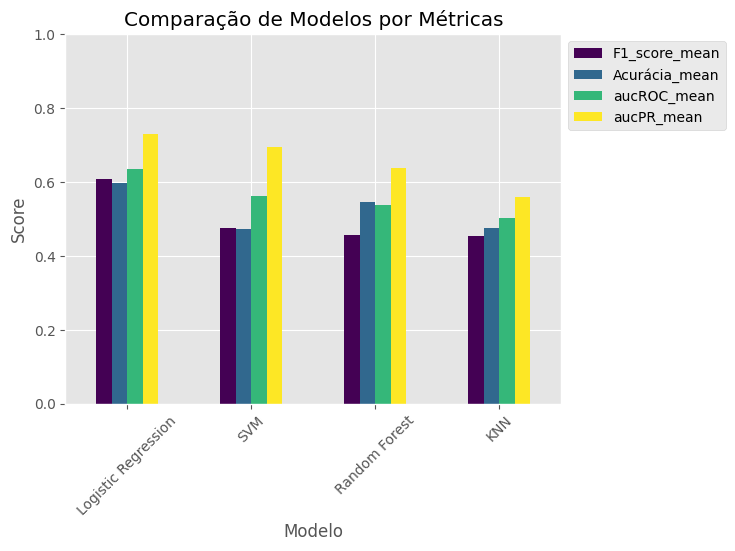

In [21]:
# Configurar o gráfico
plt.figure(figsize=(10, 6))
df_comparacao.set_index('Modelo').plot(kind='bar', rot=45, colormap='viridis')
plt.title('Comparação de Modelos por Métricas')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [22]:
# Pegar o melhor modelo com base no F1-score
melhor_modelo = df_comparacao.iloc[0]['Modelo']
melhor_f1 = df_comparacao.iloc[0]['F1_score_mean']
melhores_parametros = resultados_gerais[melhor_modelo]['melhores_parametros'][0]

# Imprimir em formato amigável
print(f"\n=== MELHOR MODELO ===")
print(f"Nome: {melhor_modelo}")
print(f"F1-Score Médio: {melhor_f1:.2f}")
print("\nParâmetros Otimizados:")
for parametro, valor in melhores_parametros.items():
    print(f" - {parametro}: {valor}")


=== MELHOR MODELO ===
Nome: Logistic Regression
F1-Score Médio: 0.61

Parâmetros Otimizados:
 - classifier__C: 1
 - classifier__penalty: l1
 - classifier__solver: liblinear
 - pca__n_components: 3
